# Introduction to Numerical ODE Solutions
*Source: http://phys.csuchico.edu/ayars/312 *


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler method

### Definition of the Euler method

In [2]:
def euler(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = np.zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(t-dt, y[j-1])*dt
        
    # return the answer
    return y


### Example

Define a differential equation: fall with air drag
$$ a = \frac{dv}{dt} = g - cv^2 $$
$$ c = \frac{1/2 \rho A C_d}{m} $$

In [11]:
def drag(time, state):
    global g,c
    v = state[0]
    return g - c*v*v  

Integration example

Terminal velocity =  89.48658790455188 m/s


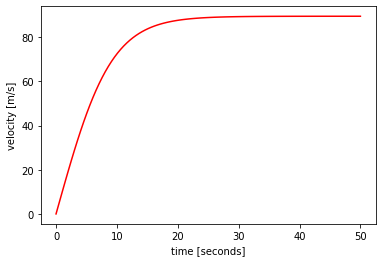

In [12]:
initial_state = np.array([0.0])
g = 9.81

# Human falling in air
rho = 1.225 # kg/m^3
Cd = 1
A = 0.1 # m^2
mass = 50 # kg
c = 0.5*A*rho*Cd/mass

times = np.linspace(0,50,100)
velocity = euler(drag,initial_state,times)

plt.plot(times,velocity,'r-')
plt.xlabel('time [seconds]')
plt.ylabel('velocity [m/s]')

print('Terminal velocity = ', velocity[-1][0], 'm/s')

### Example 2 : Simple Harmonic Oscillator

Define a differential equation: simple harmonic motion

In [13]:
def SHO(time, state):
    global omega
    g0 = state[1]
    g1 = -omega*omega*state[0]
    return np.array([g0,g1])


Set up the initial conditions and integration times

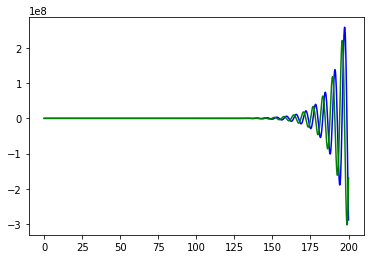

In [23]:
initial_state = np.array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
wanted_times = np.linspace(0, 200, 1000)
answer = euler(SHO, initial_state, wanted_times)

# Plot the results
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()


### Euler-Cromer (improved Euler)

In [24]:
def eulerC(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = np.zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(t, y[j-1])*dt
        
        
    # improve the calculation by computing the velocity at the *next* step    
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j,0] = y[j-1,0] + derivs(t, y[j-1])[0]*dt    
        y[j,1] = y[j-1,1] + derivs(t, y[j])[1]*dt    
    # return the answer
    return y


### Same example

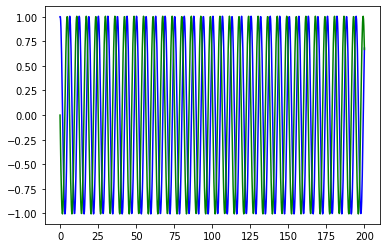

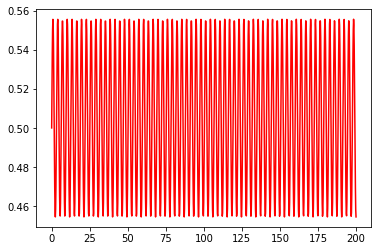

In [25]:
answer = eulerC(SHO, initial_state, wanted_times)

# Plot the results
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()

# plot energy vs time
m = 1
k = omega*omega*m
energy = 0.5*(k*x**2 + m*v**2)
plt.plot(wanted_times,energy,'r-')


## Runge-Kutta method

Now let's implement a 2nd-order Runge Kutta (RK).
This function moves the value of ’y’ forward by a single step of size ’dt’, 
using a second−order Runge−Kutta algorithm. This particular algorithm is equivalent to 
finding the average of the slope at time t and at time
( t+dt ) , and using that average slope to find value of y.

In [29]:
def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(time, y)
    k1 = dt*derivs(time+dt, y+k0) 
    y_next = y+0.5*(k0+k1)
    return y_next


### Examples

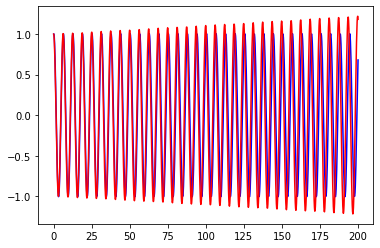

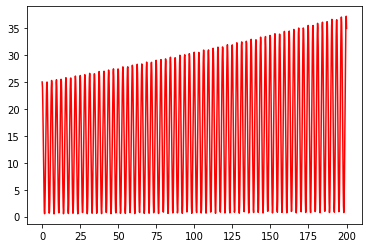

In [30]:
initial_state = np.array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 200
dt = tau/float(N-1)
wanted_times = np.linspace(0, tau, N)

answerE  = euler(SHO, initial_state, wanted_times)

answerRK = np.zeros([N,2])
answerRK[0,:] = initial_state
for j in range (N-1):
    answerRK[j+1] = rk2(answerRK[j], 0, dt , SHO)

# Plot the results
xE = answerE[:,0]
vE = answerE[:,1]
xRK = answerRK[:,0]
vRK = answerRK[:,1]
plt.plot(wanted_times, x, 'b-')
#plt.plot(wanted_times, xE, 'g-')
plt.plot(wanted_times, xRK, 'r-')
plt.show()

# plot energy vs time
m = 1
k = omega*mass
energy = 0.5*(k*xRK**2 + m*vRK**2)
plt.plot(wanted_times,energy,'r-')


## SciPy library 

SciPy offers an interface to multiple integration routines, incuding RK23 , RK45, and LSODA routine from ODEPACK Fortran library (adaptive, high-performance multi-step integration) -- see ``scipy.integrate`` 

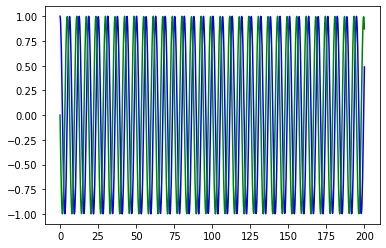

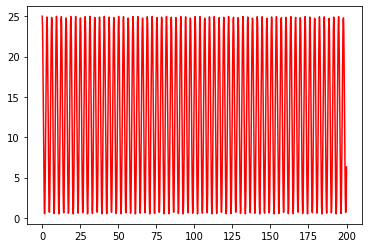

In [34]:
from scipy.integrate import solve_ivp

answer  = solve_ivp(SHO, y0=initial_state, method='LSODA', 
                    t_span=(wanted_times[0],wanted_times[-1]), 
                    t_eval=wanted_times, rtol=1e-5)
#print(answer)
x = answer.y[0,:]
v = answer.y[1,:]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()

# plot energy vs time
m = 1
k = omega*omega*mass
energy = 0.5*(k*x**2 + m*v**2)
plt.plot(wanted_times,energy,'r-')

Old interface

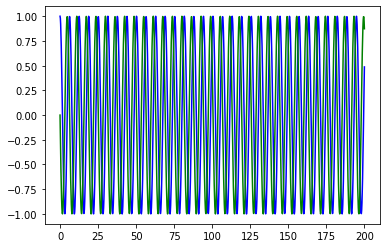

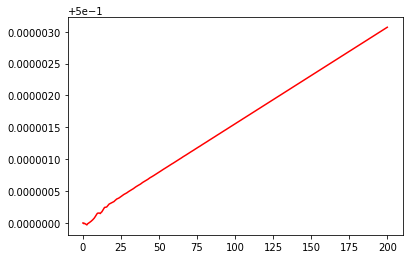

In [35]:
from scipy.integrate import odeint

answer  = odeint(SHO, initial_state, wanted_times,tfirst=True)
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()

# plot energy vs time
m = 1
k = omega*omega*m
energy = 0.5*(k*x**2 + m*v**2)
plt.plot(wanted_times,energy,'r-')